# Wine quality classification - 10

In [25]:
from pandas import read_csv, DataFrame
from seaborn import displot
import matplotlib.pyplot as plt
import numpy as np
wine = read_csv('WineQt.csv')
wine = wine.drop('Id',axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
wine.groupby('quality').size()


quality
3      6
4     33
5    483
6    462
7    143
8     16
dtype: int64

In [29]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
feature = wine.drop(['quality'],axis=1)
feature.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90


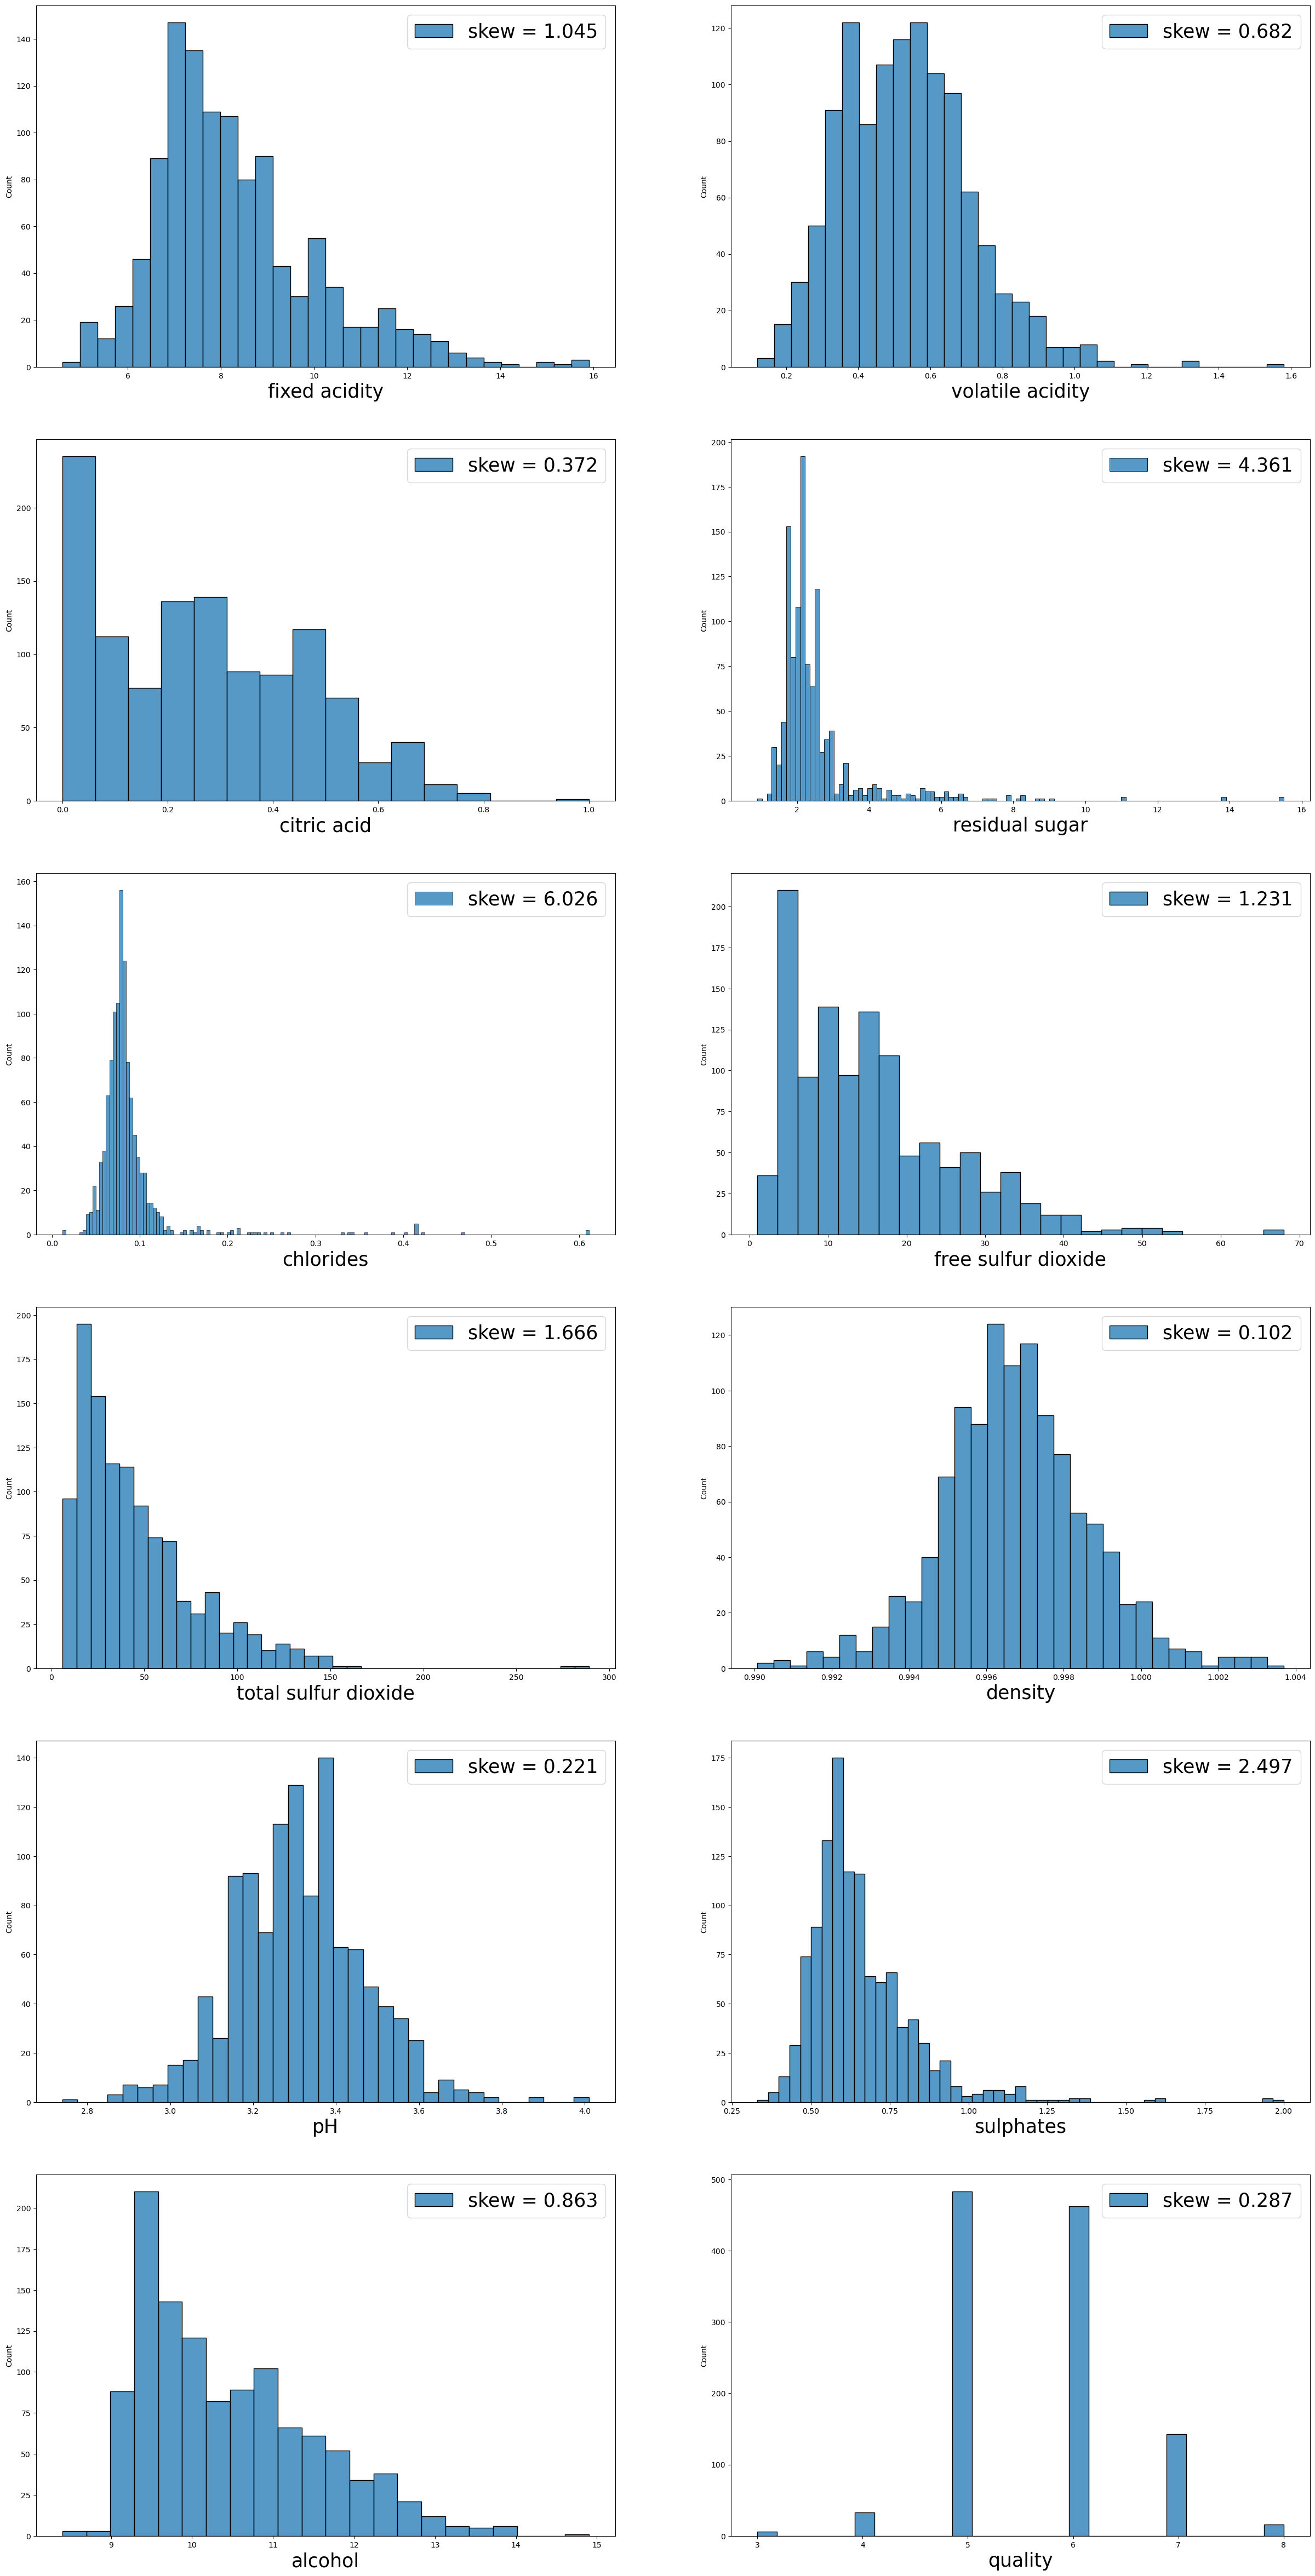

In [33]:
# Distribution of features
from seaborn import histplot
fig,axs = plt.subplots(nrows=6, ncols=2,figsize=(30,60))
for p,ax in zip(wine.columns,axs.flat):
    skew = wine[p].skew()
    histplot(wine[p],kde=False,label = 'skew = %.3f'%skew, ax=ax)
    ax.legend(loc='best',fontsize=25)
    ax.set_xlabel(p,fontsize=25)
plt.show()

<Axes: >

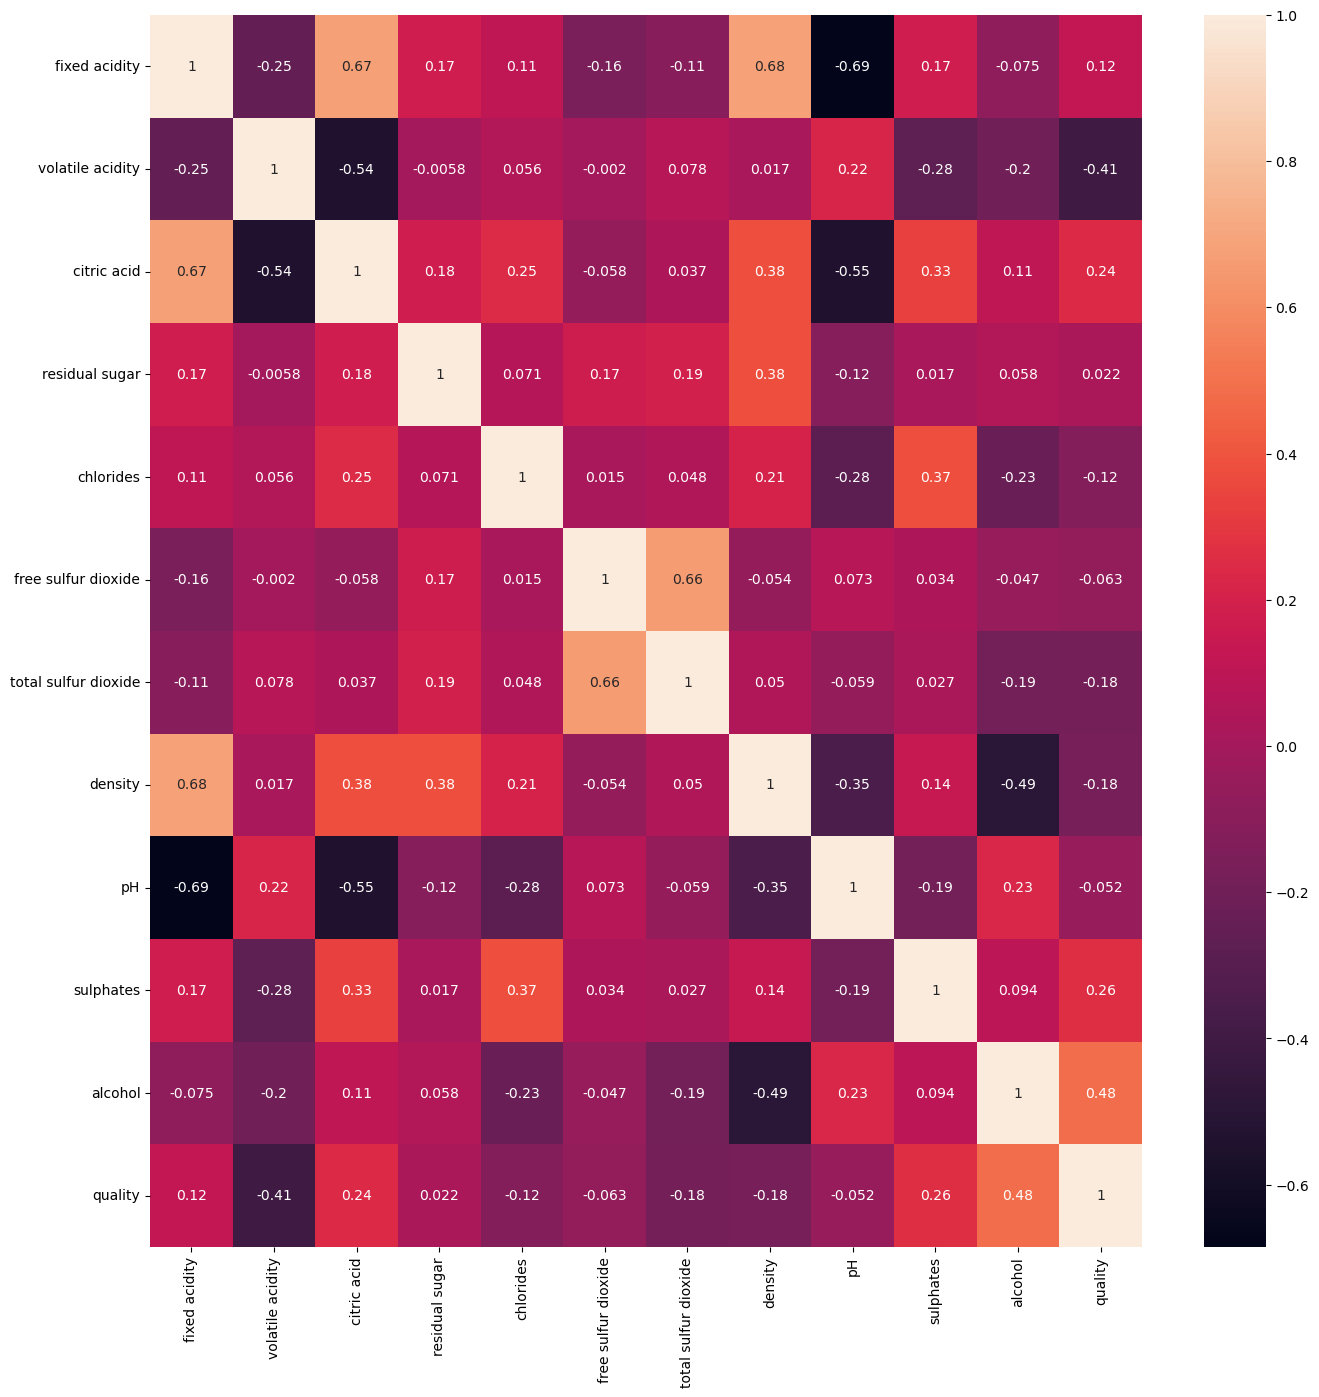

In [35]:
# correlation
from seaborn import heatmap
corr = wine.corr()
fig = plt.figure(figsize=(16,16))
heatmap(corr,annot=True)

In [37]:
from sklearn.preprocessing import StandardScaler
from pandas import concat
scale = StandardScaler()
data = DataFrame(scale.fit_transform(feature))
data = concat([data,wine['quality']],axis=1)
data.columns = wine.columns
ave_gp = data.groupby('quality').mean()
ave_gp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,0.079509,2.039276,-0.288389,0.099249,0.389460,-0.726998,-0.653529,0.494358,0.323456,-0.632369,-0.693750
4,-0.287389,0.939332,-0.521905,0.025466,0.166260,-0.074859,-0.162008,-0.031710,0.512130,-0.116419,-0.167793
5,-0.085890,0.300415,-0.143641,0.006142,0.102389,0.097341,0.286393,0.177858,-0.056986,-0.260286,-0.499051
6,0.003800,-0.146930,-0.023827,-0.064447,-0.034950,-0.039051,-0.182287,-0.062813,0.081567,0.110548,0.197119
7,0.309096,-0.766715,0.601270,0.168216,-0.247972,-0.105117,-0.257118,-0.342773,-0.152508,0.504090,0.961913
8,0.283450,-0.675775,0.834874,0.082340,-0.354419,-0.444367,-0.504755,-0.611824,-0.449501,0.637268,1.382415


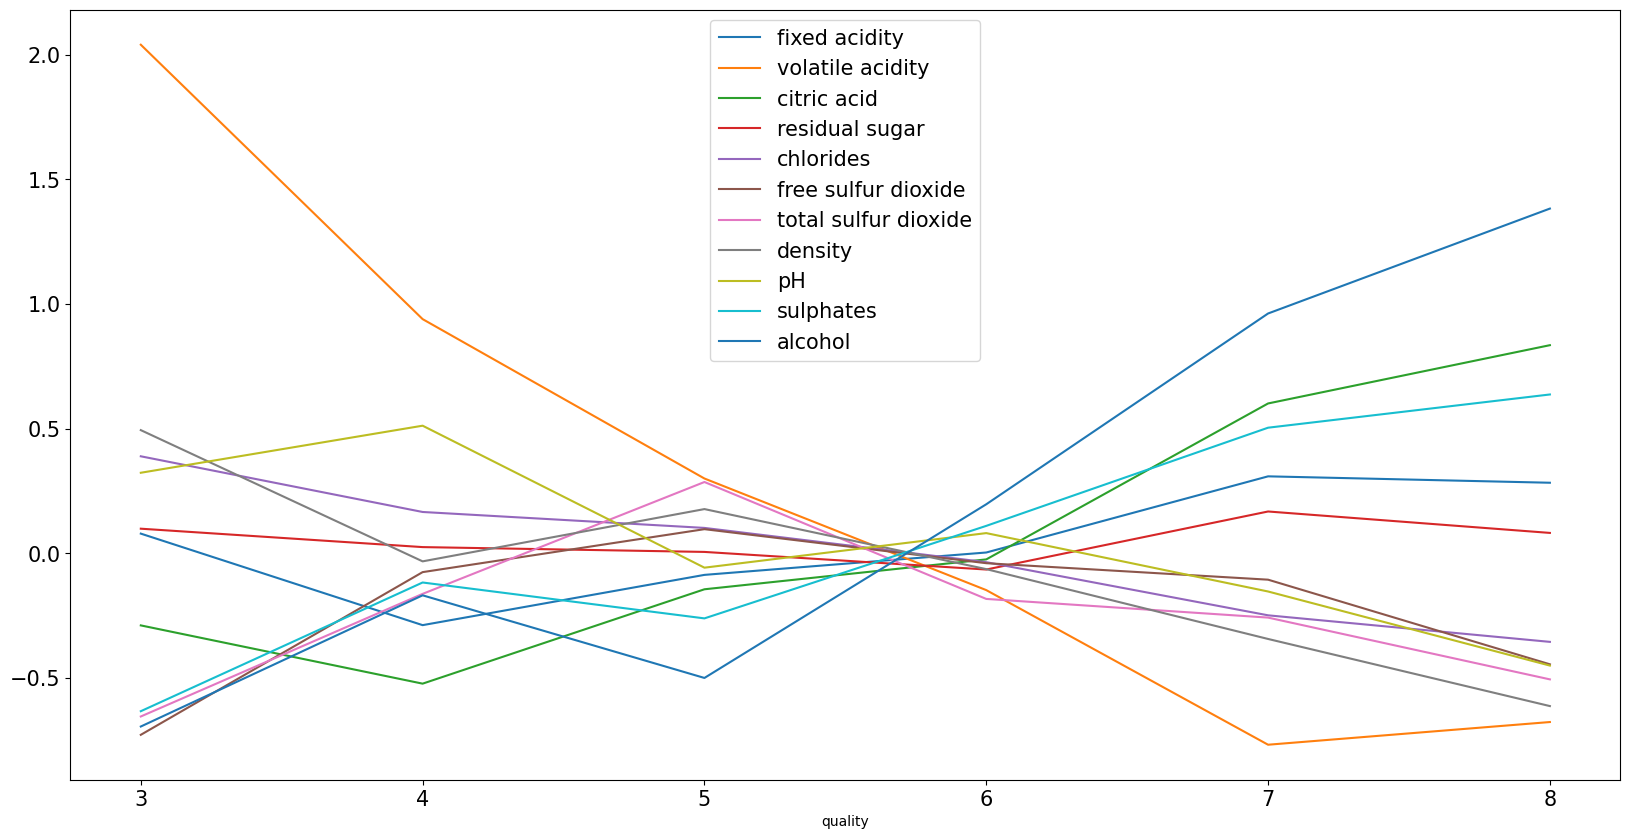

In [43]:
ave_gp.plot(kind='line',figsize=(20,10),fontsize=15)
plt.legend(fontsize=15)

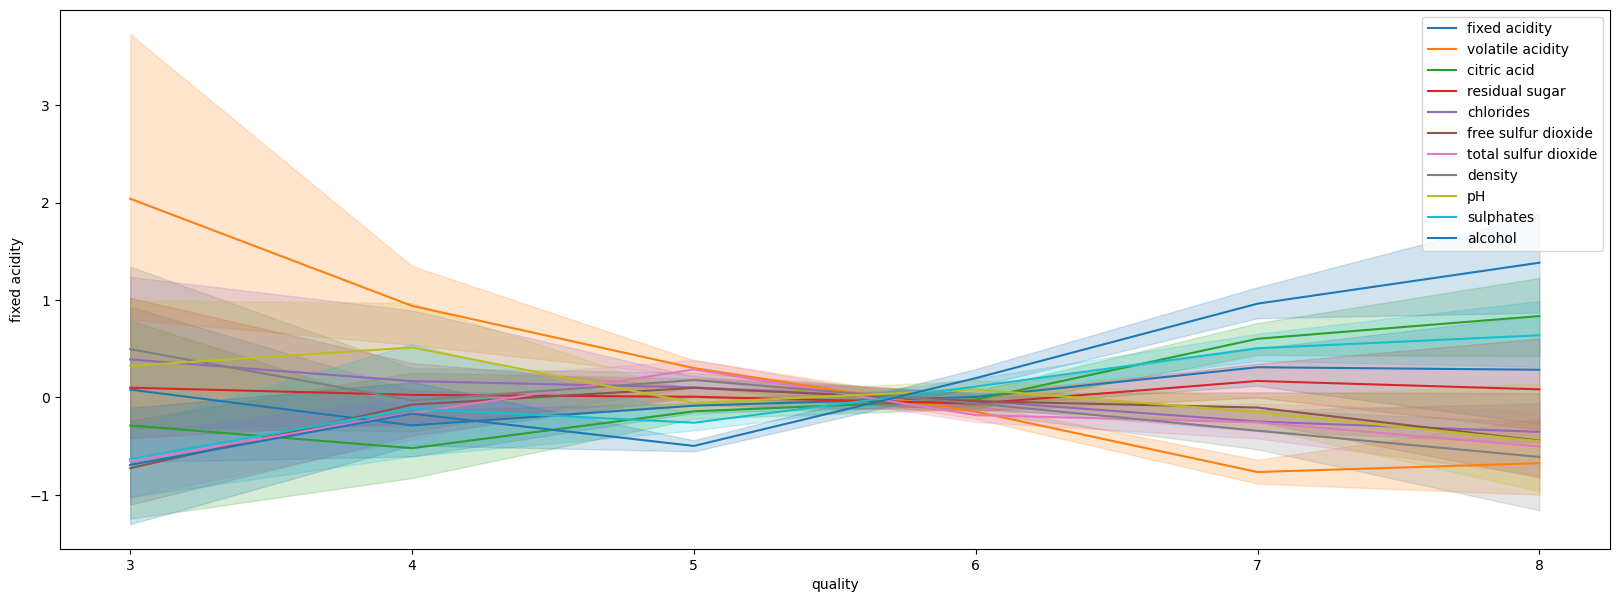

In [45]:
from seaborn import lineplot
plt.figure(figsize=(20,7))
for p in data.columns[:11]:
    lineplot(data=data,x='quality',y=p,label=p)

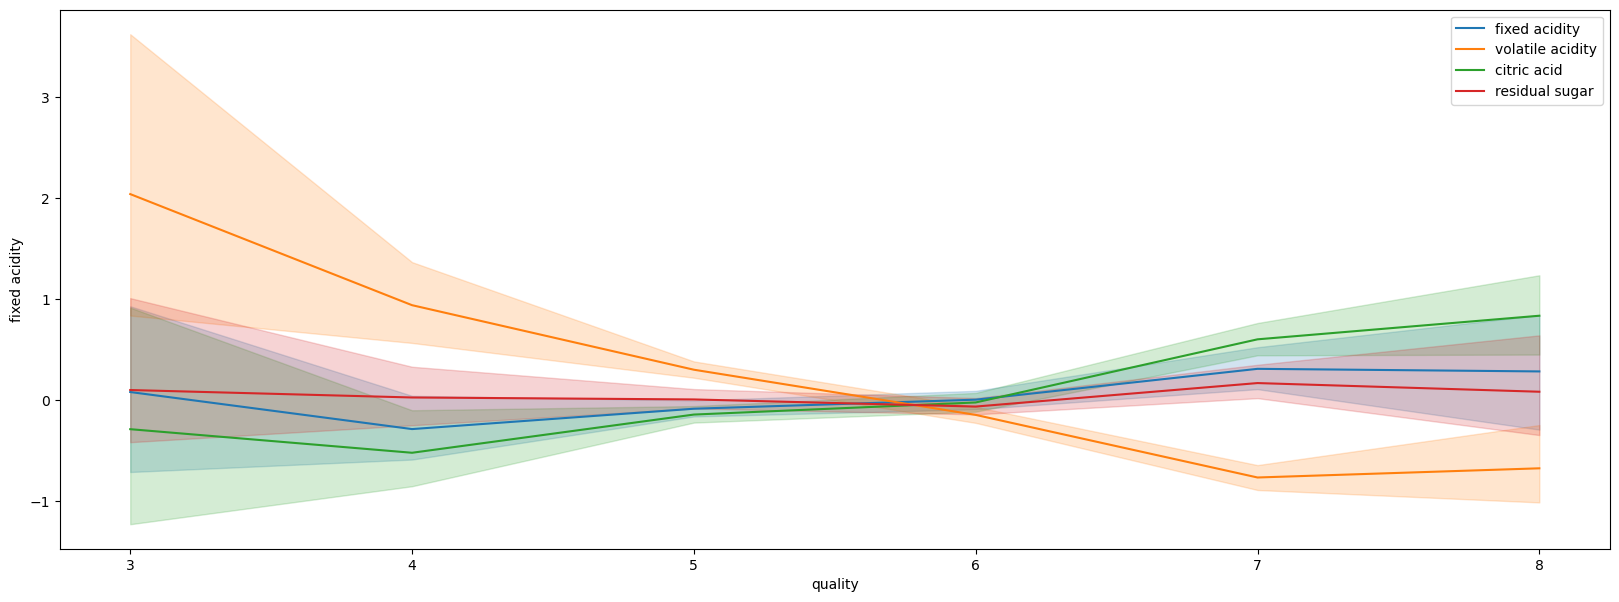

In [47]:
plt.figure(figsize=(20,7))
for p in data.columns[:4]:
    lineplot(data=data,x='quality',y=p,label=p)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, wine['quality'], test_size = 0.2 ,
                                                    random_state = 42)

In [51]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
prinCom = DataFrame(pca.fit_transform(X_train))
pca.explained_variance_ratio_.round(3)

array([0.946, 0.049, 0.003, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

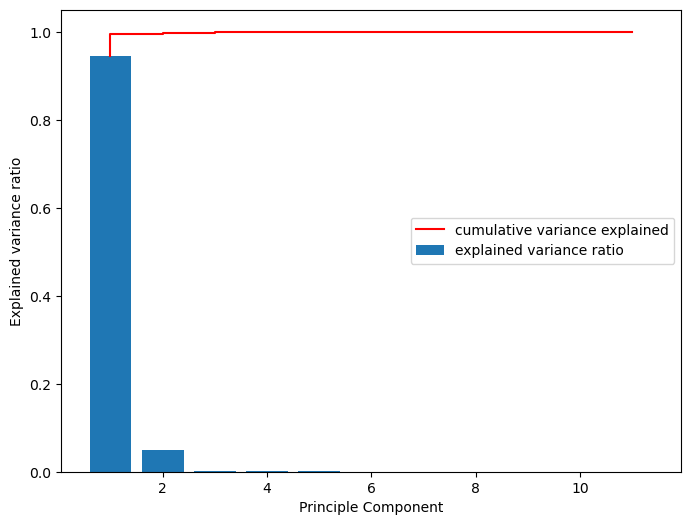

PC1  Cumulative variance: 94.59 %
PC2  Cumulative variance: 99.50 %
PC3  Cumulative variance: 99.76 %
PC4  Cumulative variance: 99.90 %
PC5  Cumulative variance: 99.99 %
PC6  Cumulative variance: 100.00 %
PC7  Cumulative variance: 100.00 %
PC8  Cumulative variance: 100.00 %
PC9  Cumulative variance: 100.00 %
PC10  Cumulative variance: 100.00 %
PC11  Cumulative variance: 100.00 %


In [53]:
e_v_r = pca.explained_variance_ratio_
cum_evr = np.cumsum(e_v_r)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(e_v_r)+1),e_v_r,label='explained variance ratio')
plt.step(range(1,len(cum_evr) + 1),cum_evr,color='red',label='cumulative variance explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle Component')
plt.legend(loc='center right')
plt.show()

for i in range(len(cum_evr)):
    print('PC'+str(i+1),' Cumulative variance: %.2f %%'%(cum_evr[i]*100))

quality
3      6
4     27
5    387
6    363
7    117
8     14
dtype: int64


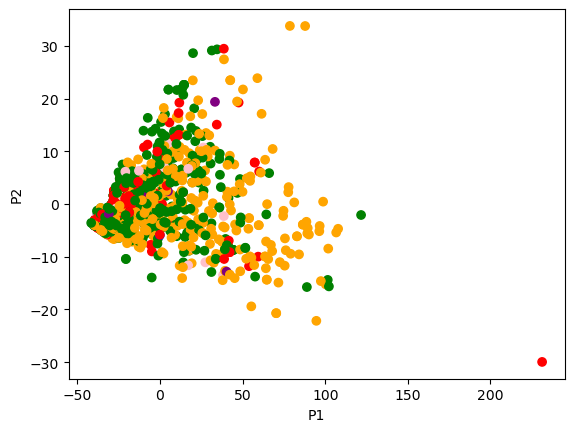

In [59]:
color = { 3:'blue', 4:'pink' , 5:'orange', 6:'green', 7:'red', 8:'purple'}
colored = [color.get(k) for k in y_train]
plt.scatter(prinCom.iloc[:,0],prinCom.iloc[:,1],color=colored)
plt.xlabel('P1')
plt.ylabel('P2')
print(DataFrame(y_train).groupby('quality').size())